In [1]:
from sympy import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x,f,y = symbols('x f y')

In [3]:
f_b = exp(-x)*cos(2*pi*x)

In [4]:
int_b = integrate(f_b, x)

In [5]:
print_latex(int_b)

\frac{2 \pi \sin{\left(2 \pi x \right)}}{e^{x} + 4 \pi^{2} e^{x}} - \frac{\cos{\left(2 \pi x \right)}}{e^{x} + 4 \pi^{2} e^{x}}


In [6]:
int_b_res = int_b.subs(x, 1).evalf() - int_b.subs(x, 0).evalf()

In [7]:
int_b_res

0.0156162369044908

In [8]:
N(int_b_res, 13)

0.01561623690449

In [9]:
df = pd.read_csv('saida-2-erro-13687303.csv', header=0)
df_str = pd.read_csv('saida-2-erro-13687303.csv', header=0, dtype=str)

In [10]:
df_str.head()

,n,h,tr,sp,bl
0,12,0.08333333333,0.01598707178,0.01559527278,0.01562026045
1,24,0.04166666667,0.01570800110,0.01561497754,0.01561629119
2,48,0.02083333333,0.01563911950,0.01561615896,0.01561623772
3,96,0.01041666667,0.01562195391,0.01561623204,0.01561623692
4,192,0.00520833333,0.01561766593,0.01561623660,0.01561623690


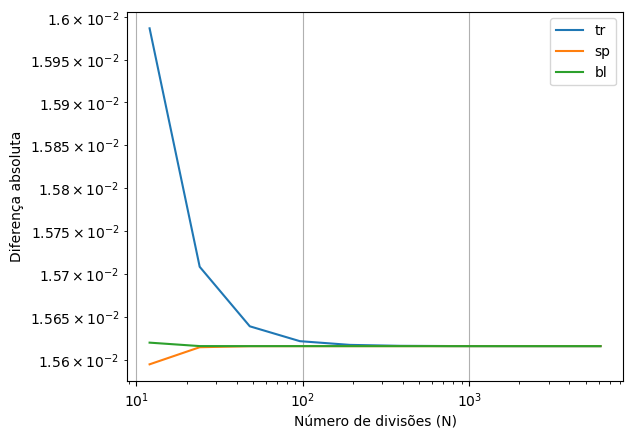

In [28]:
f1, ax1 = plt.subplots()
ax1.plot(df['n'], df['tr'], label='tr')
ax1.plot(df['n'], df['sp'], label='sp')
ax1.plot(df['n'], df['bl'], label='bl')
ax1.legend()
ax1.grid()
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.set_ylabel('Diferença absoluta')
ax1.set_xlabel('Número de divisões (N)')

f1.savefig('tarefa-b-graf-1-13687303.pdf', dpi=300, bbox_inches='tight')

In [12]:
import LabIFSC as lab

In [13]:
df.head()

,n,h,tr,sp,bl
0,12,0.083333,0.015987,0.015595,0.015620
1,24,0.041667,0.015708,0.015615,0.015616
2,48,0.020833,0.015639,0.015616,0.015616
3,96,0.010417,0.015622,0.015616,0.015616
4,192,0.005208,0.015618,0.015616,0.015616


In [14]:
list(df.columns)

['n', 'h', 'tr', 'sp', 'bl']

In [15]:
list(df['n'])

[12, 24, 48, 96, 192, 384, 768, 1536, 3072, 6144]

In [21]:
tab = lab.Tabela(titulo='Diferenças absolutas para cada método de integração')

In [22]:
for col in list(df_str.columns):
    tab.addColuna(lab.arrayM(arrayNominal=df_str[col], incertezas=0.0, unidades='', transformer=list), titulo=col)

In [23]:
print(tab.gerarLatex())

\begin{table}[H]
\centering
\caption{Diferenças absolutas para cada método de integração}
\label{yourLabelHere}
\begin{tabular}{|c|c|c|c|c|}
\hline
\textbf{n () $\pm$ 0 ()}&\textbf{h () $\pm$ 0 ()}&\textbf{tr () $\pm$ 0 ()}&\textbf{sp () $\pm$ 0 ()}&\textbf{bl () $\pm$ 0 ()}\\ \hline
12,0&0,08333333333&0,01598707178&0,01559527278&0,01562026045\\ \hline
24,0&0,04166666667&0,0157080011&0,01561497754&0,01561629119\\ \hline
48,0&0,02083333333&0,0156391195&0,01561615896&0,01561623772\\ \hline
96,0&0,01041666667&0,01562195391&0,01561623204&0,01561623692\\ \hline
192,0&0,00520833333&0,01561766593&0,0156162366&0,0156162369\\ \hline
384,0&0,00260416667&0,01561659415&0,01561623689&0,0156162369\\ \hline
768,0&0,00130208333&0,01561632621&0,0156162369&0,0156162369\\ \hline
1536,0&0,00065104167&0,01561625923&0,0156162369&0,0156162369\\ \hline
3072,0&0,00032552083&0,01561624249&0,0156162369&0,0156162369\\ \hline
6144,0&0,00016276042&0,0156162383&0,0156162369&0,0156162369\\ \hline
\end{tabular}
\capti

In [25]:
print(df_str.to_latex(index=False))

\begin{tabular}{lllll}
\toprule
   n &                        h &                       tr &                       sp &                       bl \\
\midrule
  12 &            0.08333333333 &            0.01598707178 &            0.01559527278 &            0.01562026045 \\
  24 &            0.04166666667 &            0.01570800110 &            0.01561497754 &            0.01561629119 \\
  48 &            0.02083333333 &            0.01563911950 &            0.01561615896 &            0.01561623772 \\
  96 &            0.01041666667 &            0.01562195391 &            0.01561623204 &            0.01561623692 \\
 192 &            0.00520833333 &            0.01561766593 &            0.01561623660 &            0.01561623690 \\
 384 &            0.00260416667 &            0.01561659415 &            0.01561623689 &            0.01561623690 \\
 768 &            0.00130208333 &            0.01561632621 &            0.01561623690 &            0.01561623690 \\
1536 &            0.00065104167

/tmp/ipykernel_284164/3573550689.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_str.to_latex(index=False))
